In [1]:
from urllib.request import urlopen
words = urlopen("https://raw.githubusercontent.com/karpathy/makemore/master/names.txt").read().decode().splitlines()

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [5]:
# Create the training set of all the bigrams
xs, ys = [], [] # inputs, outputs
for w in words[:1] :
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]) :
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

. e
e m
m m
m a
a .


In [6]:
xs = torch.tensor(xs) # input
ys = torch.tensor(ys) # desired output (+1 char)
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [7]:
# input = 27 one hot (de 5)
# 1 layer of 27 neurons that embed the onehot to float.
# 1 output of 27 neurons that is one_hot result (de 5) 

In [8]:
# input neurons as one_hot
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

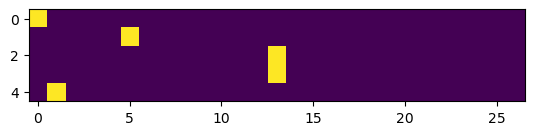

In [9]:
plt.imshow(xenc) # input as one_hot vector

In [10]:
# Initialised Neural Network
neuronsNb = 27
W = torch.randn((neuronsNb, neuronsNb)) # 2 layers of 27 neurons (last layer is output)
# Multiply input onhot to factored weights. Then exp the result to have results>0. (c'est un softmax manuel pour avoir des probs)
counts = (xenc @ W).exp() # matrice mul : (5, 27) @ (27, 27) -> (5, 27)
counts

tensor([[ 1.1277,  0.7924,  0.2405,  0.6036,  1.1364,  0.5923,  1.8339,  5.7794,
          2.2606,  1.0068,  0.3647,  1.8375,  0.2896,  0.9189,  3.3069,  2.6562,
          0.3842, 10.6600,  2.9807,  2.6020,  1.2158,  0.5745,  0.8366,  1.0415,
          1.2287,  5.7228,  0.3382],
        [ 1.0423,  2.8240,  3.8605,  0.3008,  1.5671,  0.3897,  0.4499,  0.8871,
          2.1391,  1.7771,  0.3015,  2.2664,  2.2150,  0.8389,  0.4896,  3.4855,
          4.5650,  0.9048,  0.3180,  1.2987,  3.7580,  3.0427,  2.1624,  0.6314,
          0.0914,  0.5489, 10.4315],
        [ 0.5332,  0.4403,  4.8669,  6.2667,  4.3952,  1.6642,  4.2988,  0.8486,
          0.5686,  2.4200,  0.4168,  3.5823,  1.4072,  0.3114, 18.0384,  0.3735,
          1.6329,  0.5404,  2.4544,  0.4053,  1.6724,  0.3741,  3.0460,  4.5608,
          0.6513,  0.4686,  0.3061],
        [ 0.5332,  0.4403,  4.8669,  6.2667,  4.3952,  1.6642,  4.2988,  0.8486,
          0.5686,  2.4200,  0.4168,  3.5823,  1.4072,  0.3114, 18.0384,  0.3735

In [11]:
# We can get the probability matrice from the (27, 27) weights!
countSum = counts.sum(1, keepdims=True)
probs = counts / countSum # probs for next char (softmaxing)
probs

tensor([[0.0215, 0.0151, 0.0046, 0.0115, 0.0217, 0.0113, 0.0350, 0.1104, 0.0432,
         0.0192, 0.0070, 0.0351, 0.0055, 0.0176, 0.0632, 0.0508, 0.0073, 0.2037,
         0.0570, 0.0497, 0.0232, 0.0110, 0.0160, 0.0199, 0.0235, 0.1094, 0.0065],
        [0.0198, 0.0537, 0.0734, 0.0057, 0.0298, 0.0074, 0.0086, 0.0169, 0.0407,
         0.0338, 0.0057, 0.0431, 0.0421, 0.0160, 0.0093, 0.0663, 0.0868, 0.0172,
         0.0060, 0.0247, 0.0715, 0.0579, 0.0411, 0.0120, 0.0017, 0.0104, 0.1984],
        [0.0080, 0.0066, 0.0731, 0.0942, 0.0660, 0.0250, 0.0646, 0.0128, 0.0085,
         0.0364, 0.0063, 0.0538, 0.0211, 0.0047, 0.2711, 0.0056, 0.0245, 0.0081,
         0.0369, 0.0061, 0.0251, 0.0056, 0.0458, 0.0685, 0.0098, 0.0070, 0.0046],
        [0.0080, 0.0066, 0.0731, 0.0942, 0.0660, 0.0250, 0.0646, 0.0128, 0.0085,
         0.0364, 0.0063, 0.0538, 0.0211, 0.0047, 0.2711, 0.0056, 0.0245, 0.0081,
         0.0369, 0.0061, 0.0251, 0.0056, 0.0458, 0.0685, 0.0098, 0.0070, 0.0046],
        [0.0159, 0.0362,

In [12]:
# loss computing
nlls = torch.zeros(5)
for i in range(5) :
    x = xs[i].item()
    y = ys[i].item()
    p = probs[i, y]
    print("prob ", p.item())
    nll = -torch.log(p) # negative log likelihood (loss)
    print("loss = ", nll.item())
    nlls[i] = nll
    
print("========================")
print("loss = ", nlls.mean().item())

prob  0.011318865232169628
loss =  4.4812846183776855
prob  0.01595274731516838
loss =  4.138123989105225
prob  0.004679189994931221
loss =  5.364630222320557
prob  0.006616814527660608
loss =  5.018141269683838
prob  0.015911461785435677
loss =  4.140715599060059
loss =  4.628579139709473


In [13]:
probs[torch.arange(5), ys] # pour chaque probs (les 5), récupère la probability du desired char ys
# We have terrible prob

tensor([0.0113, 0.0160, 0.0047, 0.0066, 0.0159])

In [14]:
#Let's restart and train !
W = torch.randn((neuronsNb, neuronsNb), requires_grad=True)

In [15]:
# Create the training set of all the bigrams
xs, ys = [], [] # inputs, outputs
for w in words :
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]) :
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs) # input
ys = torch.tensor(ys) # desired output (+1 char)
num = xs.nelement()
print("number of example = ", num)

number of example =  228146


In [16]:
# Training
lossPoint = []
for k in range(100) :
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    counts = (xenc @ W).exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    lossPoint.append(loss.item())
    # backward pass
    W.grad = None
    loss.backward()
    # Fitness the neural net
    W.data -= 50 * W.grad

print(loss.item())

2.473555326461792


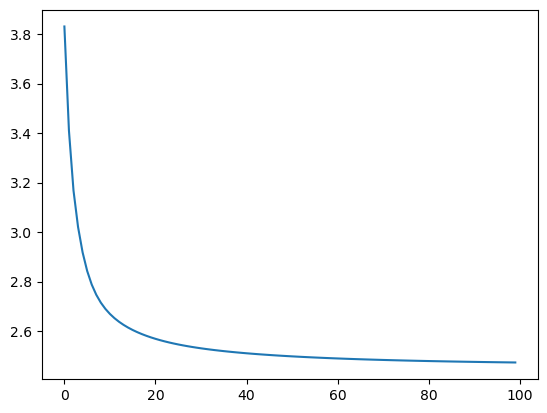

In [17]:
plt.plot(torch.arange(len(lossPoint)), lossPoint)

In [18]:
# Let's try this model !
out = []
ix = 0
itos = {i+1:s for i,s in enumerate(chars)}
itos[0] = '.'
while True :
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    counts = (xenc @ W).exp() # Doit probablement être optimizable car beaucoup de multiplication par 0
    probs = counts / counts.sum(1, keepdims=True)
    # probs to oneHot the output (randomized from prob)
    ix = torch.multinomial(probs, num_samples=1, replacement=True).item()
    out.append(itos[ix])
    if itos[ix] == '.' :
        break
print(''.join(out))

bullyodenelstrig.
